In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('Comment Ratings.csv')
df.head()

,Unnamed: 0,Comments,Ratings
0,0,Awesome,5.0
1,1,Best buy at this price! The display quality is...,5.0
2,2,Good product value for money but ordering is t...,5.0
3,3,Good mobile,5.0
4,4,best good product prive battry camera all very...,5.0


In [40]:
#removing id as it does not impact the model
df.drop('Unnamed: 0', axis =1, inplace =True)

In [4]:
#checking number of rows and columns of the given dataset
df.shape

(2278, 2)

In [5]:
df.columns

Index(['Comments', 'Ratings'], dtype='object')

In [6]:
#Lets check the value counts for every rating.
print(df['Ratings'].value_counts())

5.0    530
4.0    518
2.0    410
1.0    410
3.0    410
Name: Ratings, dtype: int64


In [41]:
df.drop_duplicates(inplace = True)
df.shape

(2101, 2)

In [42]:
df.describe()

,Ratings
count,2101.000000
mean,3.034269
std,1.416154
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


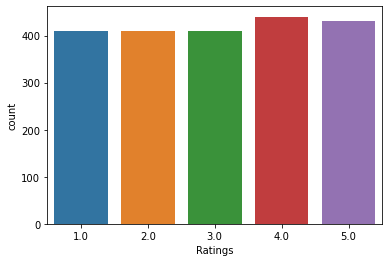

In [15]:
sns.countplot(x="Ratings" , data = df)
plt.show()

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\OWNER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OWNER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\OWNER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [46]:
df['Comments']=df['Comments'].apply(str)

In [49]:
df['tokenized_text'] = df['Comments'].apply(word_tokenize)

In [43]:
lem = WordNetLemmatizer()
new_stopwords_list = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','!','@','#','$','%','^','&','*','(',')'])

In [44]:
def lemmatize_text(text):
    return [lem.lemmatize(w) for w in text if w not in new_stopwords_list]

In [50]:
df['Lemmatized_Text'] = df['tokenized_text'].apply(lemmatize_text).apply(', '.join)

In [51]:
df.head()

,Comments,Ratings,Lemmatized_Text,tokenized_text
0,Awesome,5.0,Awesome,[Awesome]
1,Best buy at this price! The display quality is...,5.0,"Best, buy, price, The, display, quality, amazi...","[Best, buy, at, this, price, !, The, display, ..."
2,Good product value for money but ordering is t...,5.0,"Good, product, value, money, ordering, difficu...","[Good, product, value, for, money, but, orderi..."
3,Good mobile,5.0,"Good, mobile","[Good, mobile]"
4,best good product prive battry camera all very...,5.0,"best, good, product, prive, battry, camera, good","[best, good, product, prive, battry, camera, a..."


In [52]:
import re
df['Lemmatized_Text'] = df['Lemmatized_Text'].str.lower()
df['Lemmatized_Text'] = df['Lemmatized_Text'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", x))
df['Lemmatized_Text'] = df['Lemmatized_Text'].apply(lambda x: re.sub(r"\d+", "", x))
df.head()

,Comments,Ratings,Lemmatized_Text,tokenized_text
0,Awesome,5.0,awesome,[Awesome]
1,Best buy at this price! The display quality is...,5.0,best buy price the display quality amazing i c...,"[Best, buy, at, this, price, !, The, display, ..."
2,Good product value for money but ordering is t...,5.0,good product value money ordering difficult wi...,"[Good, product, value, for, money, but, orderi..."
3,Good mobile,5.0,good mobile,"[Good, mobile]"
4,best good product prive battry camera all very...,5.0,best good product prive battry camera good,"[best, good, product, prive, battry, camera, a..."


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
cv = TfidfVectorizer(stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(1, 1))

# Use the content column instead of our single text variable
x = cv.fit_transform(df['Lemmatized_Text'])
x.shape

(2101, 7742)

In [55]:
y = df['Ratings']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 100, stratify = y)

**Naive bayes Classifier**

In [61]:
#Training model using Naive bayes Classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
ovr  = OneVsRestClassifier(MultinomialNB())
ovr_model = ovr.fit(x_train,y_train)
ovr_ypred = ovr_model.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [63]:
#Confusion Matrix for Naive Byes
print(confusion_matrix(y_test,ovr_ypred))

[[73  2  3 15 10]
 [33  8 18 31 12]
 [17  6 17 36 27]
 [ 3  0  5 56 46]
 [ 4  0  2 33 69]]


In [65]:
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,ovr_ypred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,ovr_ypred))

---Accuracy Score for Naive Byes---

 0.42395437262357416

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

         1.0       0.56      0.71      0.63       103
         2.0       0.50      0.08      0.14       102
         3.0       0.38      0.17      0.23       103
         4.0       0.33      0.51      0.40       110
         5.0       0.42      0.64      0.51       108

    accuracy                           0.42       526
   macro avg       0.44      0.42      0.38       526
weighted avg       0.44      0.42      0.38       526



In [35]:
#Hyperparameter Tuning

In [111]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [168]:
params = {'alpha': list(np.arange(0.1,5,0.1))}

In [169]:
mnb_grid = GridSearchCV(MultinomialNB(), param_grid= params, cv = 6, n_jobs=-1)

In [170]:
mnb_grid.fit(x_train,y_train)
print('Best Estimators == > \n', mnb_grid.best_params_)

Best Estimators == > 
 {'alpha': 0.5}


In [108]:
# mnb_clf= mnb_grid.best_estimator_
mnb_grid = mnb_clf.fit(x_train, y_train)

In [109]:
mnb_y_pred =  mnb_grid.predict(x_test)

In [110]:
print('---Confusion Matrix for Naive Byes---\n\n', confusion_matrix(y_test,mnb_y_pred))
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,mnb_y_pred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,mnb_y_pred))

---Confusion Matrix for Naive Byes---

 [[70  7 13  9  4]
 [31 15 22 23 11]
 [14 12 25 35 17]
 [ 4  2 10 61 33]
 [ 4  1  5 32 66]]
---Accuracy Score for Naive Byes---

 0.4505703422053232

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

         1.0       0.57      0.68      0.62       103
         2.0       0.41      0.15      0.22       102
         3.0       0.33      0.24      0.28       103
         4.0       0.38      0.55      0.45       110
         5.0       0.50      0.61      0.55       108

    accuracy                           0.45       526
   macro avg       0.44      0.45      0.42       526
weighted avg       0.44      0.45      0.43       526



**With One Vs Rest**

In [113]:
ovr_grid  = OneVsRestClassifier(mnb_clf)
ovr_mnb_grid = ovr_grid.fit(x_train, y_train)

In [114]:
ovr_y_pred =  ovr_mnb_grid.predict(x_test)

In [115]:
print('---Confusion Matrix for Naive Byes---\n\n', confusion_matrix(y_test,ovr_y_pred))
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,ovr_y_pred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,ovr_y_pred))

---Confusion Matrix for Naive Byes---

 [[70  6 11 12  4]
 [33 21 19 20  9]
 [16 14 24 30 19]
 [ 4  3 12 56 35]
 [ 4  1  4 31 68]]
---Accuracy Score for Naive Byes---

 0.4543726235741445

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

         1.0       0.55      0.68      0.61       103
         2.0       0.47      0.21      0.29       102
         3.0       0.34      0.23      0.28       103
         4.0       0.38      0.51      0.43       110
         5.0       0.50      0.63      0.56       108

    accuracy                           0.45       526
   macro avg       0.45      0.45      0.43       526
weighted avg       0.45      0.45      0.43       526



In [116]:
#Cross Validating.

from sklearn.model_selection import cross_val_score

cvs_mnb = cross_val_score(ovr_mnb_grid,x,y,cv=4)

cvs_mnb.mean()

0.3912420785804816

**Passive Aggressive Classifier Algorithm**

In [73]:
from sklearn.linear_model import PassiveAggressiveClassifier
ovr_pac = OneVsRestClassifier(PassiveAggressiveClassifier())

In [74]:
pac_model = ovr_pac.fit(x_train,y_train)
pac_ypred = ovr_pac.predict(x_test)

In [75]:
print('--Confusion Matrix for Passive Aggressive Classifier--\n\n',confusion_matrix(y_test,pac_ypred))
print('\n---Accuracy Score for Passive Aggressive Classifier---\n\n',accuracy_score(y_test,pac_ypred))
print('\n---Classification Report for Passive Aggressive Classifier---\n\n',classification_report(y_test,pac_ypred))

--Confusion Matrix for Passive Aggressive Classifier--

 [[58 23 15  6  1]
 [28 36 23  9  6]
 [19 28 25 15 16]
 [ 5  9 31 43 22]
 [ 5  8 18 21 56]]

---Accuracy Score for Passive Aggressive Classifier---

 0.4144486692015209

---Classification Report for Passive Aggressive Classifier---

               precision    recall  f1-score   support

         1.0       0.50      0.56      0.53       103
         2.0       0.35      0.35      0.35       102
         3.0       0.22      0.24      0.23       103
         4.0       0.46      0.39      0.42       110
         5.0       0.55      0.52      0.54       108

    accuracy                           0.41       526
   macro avg       0.42      0.41      0.41       526
weighted avg       0.42      0.41      0.42       526



### Other Models

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [77]:
ovr_lr = OneVsRestClassifier(LogisticRegression())
ovr_dt = OneVsRestClassifier(DecisionTreeClassifier())
ovr_rf = OneVsRestClassifier(RandomForestClassifier())
ovr_XGB = OneVsRestClassifier(XGBClassifier())

In [80]:
#training with the all of them

ovr_lr.fit(x_train,y_train)
ovr_dt.fit(x_train,y_train)
ovr_rf.fit(x_train,y_train)
ovr_XGB.fit(x_train,y_train)

print("All Models Trained")

[13:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
All Models Trained


In [82]:
ovr_lr.score(x_test,y_test)
ovr_dt.score(x_test,y_test)
ovr_rf.score(x_test,y_test)
ovr_XGB.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [84]:
#Accuracy score
print('Logistic Regression =', accuracy_score(y_test,ovr_lr.predict(x_test)))
print('Decision Tree =', accuracy_score(y_test,ovr_dt.predict(x_test)))
print('Random Forest =', accuracy_score(y_test,ovr_rf.predict(x_test)))
print('Xtreme Gradient Boost =', accuracy_score(y_test,ovr_XGB.predict(x_test)))

Logistic Regression = 0.4619771863117871
Decision Tree = 0.3726235741444867
Random Forest = 0.42395437262357416
Xtreme Gradient Boost = 0.41064638783269963


In [87]:
#Classification Report

print('Classification report of Logistic Regression \n', classification_report(y_test,ovr_lr.predict(x_test)))
print('Classification report of Decision Tree \n', classification_report(y_test,ovr_dt.predict(x_test)))
print('Classification report of Random Forest \n', classification_report(y_test,ovr_rf.predict(x_test)))
print('Classification report of Xtreme Gradient Boost \n', classification_report(y_test,ovr_XGB.predict(x_test)))

Classification report of Logistic Regression 
               precision    recall  f1-score   support

         1.0       0.56      0.62      0.59       103
         2.0       0.42      0.38      0.40       102
         3.0       0.29      0.28      0.28       103
         4.0       0.44      0.43      0.43       110
         5.0       0.58      0.59      0.58       108

    accuracy                           0.46       526
   macro avg       0.46      0.46      0.46       526
weighted avg       0.46      0.46      0.46       526

Classification report of Decision Tree 
               precision    recall  f1-score   support

         1.0       0.42      0.45      0.43       103
         2.0       0.34      0.43      0.38       102
         3.0       0.31      0.27      0.29       103
         4.0       0.38      0.37      0.37       110
         5.0       0.42      0.34      0.38       108

    accuracy                           0.37       526
   macro avg       0.37      0.37      0.37

In [119]:
print('Confusion Matrix of Logistic Regression\n', confusion_matrix(y_test,ovr_lr.predict(x_test)))
print('Confusion Matrix of Decision Tree\n', confusion_matrix(y_test,ovr_dt.predict(x_test)))
print('Confusion Matrix of Random Forest \n', confusion_matrix(y_test,ovr_rf.predict(x_test)))
print('Confusion Matrix of Xtreme Gradient Boost \n', confusion_matrix(y_test,ovr_XGB.predict(x_test)))

Confusion Matrix of Logistic Regression
 [[64 18 15  5  1]
 [26 39 25 10  2]
 [17 22 29 21 14]
 [ 4  6 23 47 30]
 [ 4  7  9 24 64]]
Confusion Matrix of Decision Tree
 [[46 30 12  8  7]
 [27 44 17 12  2]
 [17 24 28 19 15]
 [12 14 15 41 28]
 [ 8 16 18 29 37]]
Confusion Matrix of Random Forest 
 [[60 31  7  2  3]
 [28 48 12 13  1]
 [13 37 19 16 18]
 [ 4 15 18 38 35]
 [ 2 16  7 25 58]]
Confusion Matrix of Xtreme Gradient Boost 
 [[64 19 11  7  2]
 [28 36 21 14  3]
 [12 27 28 22 14]
 [ 4 10 32 38 26]
 [ 3 14 12 29 50]]


# After checking all the parameters we can see that LogisticRegression is giving us the best predictions for this dataset.

**Hyperparameter Tuning**

# Logistic Regression

In [120]:
params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'C':[1.0,2.0],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter':[100,110],
         }

In [124]:
grid = GridSearchCV(LogisticRegression(), param_grid= params, cv = 2, n_jobs=-1)

In [125]:
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 2.0], 'max_iter': [100, 110],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [126]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'C': 2.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [127]:
clf= grid.best_estimator_

In [133]:
ovr_grid_lr=OneVsRestClassifier(clf)

In [135]:
ovr_grid_lr.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=2.0, penalty='l1',
                                                 solver='liblinear'))

In [138]:
y_pred =  ovr_grid_lr.predict(x_test)

In [139]:
print('Accuracy Score=',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score= 0.4296577946768061
Confusion Matrix
 [[64 20 12  5  2]
 [35 39 16  9  3]
 [14 24 24 27 14]
 [ 5  9 23 37 36]
 [ 3  7 11 25 62]]
Classification Report
               precision    recall  f1-score   support

         1.0       0.53      0.62      0.57       103
         2.0       0.39      0.38      0.39       102
         3.0       0.28      0.23      0.25       103
         4.0       0.36      0.34      0.35       110
         5.0       0.53      0.57      0.55       108

    accuracy                           0.43       526
   macro avg       0.42      0.43      0.42       526
weighted avg       0.42      0.43      0.42       526



In [141]:
#Cross Validating.

from sklearn.model_selection import cross_val_score

cvs_lr = cross_val_score(ovr_grid_lr,x,y,cv=4)

cvs_lr.mean()

0.39885659967409015

In [143]:
#XGB Classifier

In [144]:
xgb_params = {'n_estimators':[100,120],
         'criterion':['gini','entropy'],
        'learning_rate' :[0.25,0.30],
          'booster':['gbtree','dart'],
         'max_depth':[5,6]}

In [147]:
xgb_grid = GridSearchCV(XGBClassifier(), param_grid= xgb_params, cv = 4, n_jobs=-1)

In [148]:
xgb_grid.fit(x_train,y_train)
print('Best Estimators == > \n', xgb_grid.best_params_)

[14:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Estimators == > 
 {'booster': 'gbtree', 'criterion': 'gini', 'learning_rate': 0.25, 'max_depth': 5, 'n_estimators': 100}


In [152]:
xgb_gridclf= xgb_grid.best_estimator_
xgb_gridclf.fit(x_train, y_train)
xgb_gridclf_y_pred =  xgb_gridclf.predict(x_test)

[14:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [153]:
print('---Confusion Matrix for XGB Classifier---\n\n', confusion_matrix(y_test,xgb_gridclf_y_pred))
print('---Accuracy Score for XGB Classifier---\n\n',accuracy_score(y_test,xgb_gridclf_y_pred))
print('\n---Classification Report for XGB Classifier---\n\n',classification_report(y_test,xgb_gridclf_y_pred))

---Confusion Matrix for XGB Classifier---

 [[61 21 13  7  1]
 [26 34 22 16  4]
 [10 25 31 21 16]
 [ 6  9 26 37 32]
 [ 4 13 13 25 53]]
---Accuracy Score for XGB Classifier---

 0.41064638783269963

---Classification Report for XGB Classifier---

               precision    recall  f1-score   support

         1.0       0.57      0.59      0.58       103
         2.0       0.33      0.33      0.33       102
         3.0       0.30      0.30      0.30       103
         4.0       0.35      0.34      0.34       110
         5.0       0.50      0.49      0.50       108

    accuracy                           0.41       526
   macro avg       0.41      0.41      0.41       526
weighted avg       0.41      0.41      0.41       526



In [97]:
#Random Forest

In [154]:
rf_params = {'n_estimators':[100,120],
         'max_depth':list(range(1,5,1)),
         'min_samples_split':list(range(1,6,1)),
         'min_samples_leaf':list(range(1,5,1))}

In [159]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid= rf_params, cv = 2, n_jobs=-1)

In [160]:
rf_grid.fit(x_train,y_train)
print('Best Estimators == > \n', rf_grid.best_params_)

Best Estimators == > 
 {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 120}


In [161]:
rf_clf= rf_grid.best_estimator_
ovr_clf_rf = OneVsRestClassifier(rf_clf)
ovr_clf_rf.fit(x_train, y_train)
rf_clf_y_pred = ovr_clf_rf.predict(x_test)

In [163]:
print('---Confusion Matrix for Random Forest Classifier---\n\n', confusion_matrix(y_test,rf_clf_y_pred))
print('---Accuracy Score for Random Forest Classifier---\n\n',accuracy_score(y_test,rf_clf_y_pred))
print('\n---Classification Report for Random Forest Classifier---\n\n',classification_report(y_test,rf_clf_y_pred))

---Confusion Matrix for Random Forest Classifier---

 [[53 20  8 18  4]
 [30 31  8 28  5]
 [16 22  9 40 16]
 [ 3 10 10 58 29]
 [ 8  8  3 42 47]]
---Accuracy Score for Random Forest Classifier---

 0.376425855513308

---Classification Report for Random Forest Classifier---

               precision    recall  f1-score   support

         1.0       0.48      0.51      0.50       103
         2.0       0.34      0.30      0.32       102
         3.0       0.24      0.09      0.13       103
         4.0       0.31      0.53      0.39       110
         5.0       0.47      0.44      0.45       108

    accuracy                           0.38       526
   macro avg       0.37      0.37      0.36       526
weighted avg       0.37      0.38      0.36       526

